## Microbial mutagenicity AMES competition

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

## Data insights

In [18]:
df = pd.read_csv('ames_datapreprocessing_knime.csv')
df.head()




,Unnamed: 0,AmesResult,Structure,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,0,C,[Na+].[Na+].CC1(C)SC2C(NC(=O)C(C([O-])=O)C3=CS...,-8.11340,85.0967,207.568628,129.67,428.399,428.008867,8,...,0,1,2,0,0,0,0,0,2,1
1,1,C,FC(F)(F)C1=CC(N\N=C2/C(=O)C(=CC3=CC=CC=C23)C(=...,11.17980,225.8008,365.430948,141.12,930.476,928.036083,10,...,0,0,0,7,0,0,0,0,4,2
2,2,C,CNC(=O)\C=C(/C)OP(=O)(OC)OC,1.05370,50.5332,82.840931,73.86,223.165,223.060959,6,...,0,0,0,0,0,0,0,0,0,0
3,3,C,CC(C)NC(=O)N1CC(=O)N(C1=O)C1=CC(Cl)=CC(Cl)=C1,2.88000,79.7177,131.140795,69.72,330.171,329.033397,6,...,0,0,1,1,0,0,0,0,0,0
4,4,C,C\C(CC\C=C(\C)C1CC(=O)C(C)(C)O1)=C/CC1=C(O)C(C...,5.22402,113.9341,176.578705,83.83,420.933,420.170352,5,...,0,0,1,1,0,0,0,0,0,0


In [19]:
df.shape

(12138, 122)

In [20]:
# percentage of NaN values
df.isnull().mean()

# sum of NaN values
df.isnull().sum()

Unnamed: 0    0
AmesResult    6
Structure     0
SlogP         0
SMR           0
             ..
MQN38         0
MQN39         0
MQN40         0
MQN41         0
MQN42         0
Length: 122, dtype: int64

In [6]:
df.AmesResult.unique()

array(['C', 'A', 'B', nan], dtype=object)

In [22]:
# TODO: make it show NaN rows:
mask = df.AmesResult == 'C'



## Clean Data

### Deal with NaN values

In [34]:
def deal_with_NaN_vlaues(df, threshold=0.8):
    """deal_with_NaN_vlaues

    Arguments:
        df {DataFrame} -- DataFrame Object

    Keyword Arguments:
        threshold {float} -- drop columns and rows with missing values > threshold (default: {0.8})
    """
    # print('NaN values in DF, sorted descending:')
    print(  df.isna().sum().sort_values(ascending=False)[0:4] )

    # print('NaN values percentage in DF, sorted descending:')
    # print(df.isna().mean().round(4).sort_values(ascending=False))

    #Drop columns with missing value rate higher than threshold:
    # TODO: check why not working  !!!
    col_tresh_as_int = int(round(threshold*df.shape[0])) + 1
    print(f'col_tresh_as_int: {col_tresh_as_int}')
    df = df.dropna(axis=1, thresh=col_tresh_as_int)

    #Drop rows with missing value rate higher than threshold:
    row_tresh_as_int = int(round(threshold*df.shape[1]))
    df = df.dropna(axis=0, thresh=row_tresh_as_int)

    return df

# print(f'before: {df.shape}')

df = deal_with_NaN_vlaues(df, threshold=0)

# print(f'after: {df.shape}')

before: (12138, 122)
AmesResult    6
MQN42         0
slogp_VSA2    0
Chi1v         0
dtype: int64
col_tresh_as_int: 1
after: (12138, 122)


In [36]:
df_original = df

# be careful!!!
# df = df_original.dropna()
# remove all rows, where NaN values are in the Target column:
df = df.dropna(how='any', subset=['AmesResult'])
print(f'df shape after NaN clear: {df.shape}')


df shape after NaN clear: (12132, 122)


## Outliears

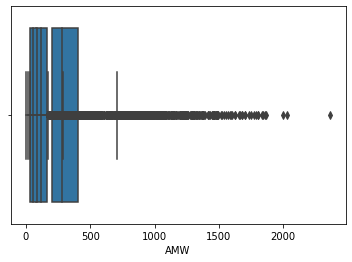

In [38]:
# TODO wrute function to find and remove outliers

df.iloc[:,5]
sns.boxplot(x=df.iloc[:,5])
sns.boxplot(x=df.iloc[:,6])
sns.boxplot(x=df.iloc[:,7])

In [40]:
### Separate input data (X) and target (y)

In [50]:
df.head()
X = df.iloc[:, 3:]

# print the name of first 3 columns:
print(X.columns[0:3])

y = df['AmesResult']

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

Index(['SlogP', 'SMR', 'LabuteASA'], dtype='object')
X shape: (12132, 119)
y shape: (12132,)


## Feature Selection

#### Remove Correlated columns

In [72]:
corr_matrix  = X.corr()

# corr_matrix = [
#     [1,2,3],
#     [4,5,6]
# ]


# print(corr_matrix.columns)

# print(corr_matrix['SlogP'])
# print(corr_matrix['SMR'])

### print values wich are > 0.8


# corr_matrix.iloc[0:, 0:]

# for column in corr_matrix.columns:
#     print('*****************************************************')
#     print(list(corr_matrix[column]))


    
corr_matrix

,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
SlogP,1.000000,0.327792,0.086885,-0.430167,0.132007,0.131890,-0.343533,-0.282914,0.290140,-0.262695,...,-0.013011,-0.045544,0.012556,0.180635,0.031360,0.003127,-0.002302,-0.034927,0.009296,-0.007719
SMR,0.327792,1.000000,0.950683,0.622526,0.935137,0.935298,0.688124,0.337354,0.765833,0.384047,...,-0.033543,0.057651,0.130526,0.734617,0.040660,0.031564,0.007788,0.121058,0.303649,0.210573
LabuteASA,0.086885,0.950683,1.000000,0.764860,0.981662,0.981814,0.804881,0.370192,0.733618,0.415559,...,-0.032693,0.054522,0.112341,0.714706,0.024920,0.026646,0.007726,0.118140,0.301679,0.208551
TPSA,-0.430167,0.622526,0.764860,1.000000,0.745311,0.745582,0.977114,0.647899,0.481173,0.662481,...,-0.036630,0.067267,0.092961,0.465803,-0.017789,0.011131,0.010275,0.139989,0.227043,0.165406
AMW,0.132007,0.935137,0.981662,0.745311,1.000000,0.999997,0.791460,0.373791,0.734627,0.420153,...,-0.032800,0.060288,0.107230,0.669803,0.027667,0.036313,0.007858,0.124947,0.285701,0.199377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MQN38,0.003127,0.031564,0.026646,0.011131,0.036313,0.036308,0.025805,-0.002733,0.010581,-0.005198,...,0.020393,0.003774,-0.013313,-0.005582,-0.003032,1.000000,-0.000256,-0.001349,0.097432,0.136074
MQN39,-0.002302,0.007788,0.007726,0.010275,0.007858,0.007873,0.012217,0.004162,0.002473,0.005710,...,-0.001439,-0.001325,-0.004890,0.002298,-0.000977,-0.000256,1.000000,-0.000435,-0.003960,-0.002927
MQN40,-0.034927,0.121058,0.118140,0.139989,0.124947,0.125040,0.146328,0.203250,0.028041,0.228094,...,-0.005343,-0.006989,0.011191,0.058451,-0.005156,-0.001349,-0.000435,1.000000,0.343068,0.449946
MQN41,0.009296,0.303649,0.301679,0.227043,0.285701,0.285801,0.240378,0.141010,-0.006957,0.159466,...,-0.001476,0.033061,0.342692,0.469962,0.110257,0.097432,-0.003960,0.343068,1.000000,0.925261


In [52]:
# from sklearn.feature_selection import VarianceThreshold

# p = 0.2
# treshold = p * (1-p)


# sel = VarianceThreshold(threshold=0)

# sel.fit(X)

# mask_retain = sel.get_support()
# # print(mask_retain)

# indexes_retain = sel.get_support(indices=True)
# print(len(indexes_retain))

# X_new = sel.transform(X)

# # get variances for each column
# sel.variances_




In [208]:
# from sklearn.feature_selection import SelectKBest, f_classif

# sel = SelectKBest(f_classif, k=20).fit(X, y)

# mask_retain = sel.get_support()
# # print(mask_retain)

# indexes_retain = sel.get_support(indices=True)
# print(indexes_retain)

# X_new = sel.transform(X)
# X_new.shape



# # TODO: map column names to indexes
# # df.iloc[:1,indexes_retain]
# print(list(df.columns[indexes_retain]))


## Split data

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=42)

## Fit the Model

In [210]:
clf = GaussianNB().fit(X_train, y_train)


## Evaluate the model

In [211]:
y_pred = clf.predict(X_test)

In [212]:
accuracy_score(y_test, y_pred)

0.2973953181668315

In [150]:
y_test[:5]

10006    C
3693     C
7935     C
11116    C
7604     B
Name: AmesResult, dtype: object

In [147]:
confusion_matrix(y_test, y_pred)

array([[ 138,    1,   18],
       [ 224,    3,   62],
       [1555,   33,  999]])